In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

In [23]:
def load_img(img_dir, img_list):
    images = []
    for i, image_name in enumerate(img_list):
        if(image_name.split('.')[1] == 'npy'):
            image = np.load(img_dir + image_name)
            images.append(image)
    images = np.array(images)
    return(images)

In [24]:
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):
    L = len(img_list)
    
    while True:
        batch_start = 0
        batch_end = batch_size
        
        while batch_start < L:
            limit = min(batch_end, L)
            
            X = load_img(img_dir, img_list[batch_start : limit])
            Y = load_img(mask_dir, mask_list[batch_start : limit])
            
            yield(X,Y)
            
            batch_start = batch_start + 1
            batch_end = batch_end + 1

In [25]:
train_img_dir = 'C:/Users/cbil/Downloads/Brats 2020/final_data/train/images/'
train_mask_dir = 'C:/Users/cbil/Downloads/Brats 2020/final_data/train/masks/'
train_img_list = os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

In [26]:
batch_size = 2

In [27]:
train_image_datagen = imageLoader(train_img_dir, train_img_list, train_mask_dir, train_mask_list, batch_size)

In [47]:
img, mask = train_image_datagen.__next__()
print(img.shape)
print(mask.shape)

img_num = random.randint(0,img.shape[0] - 1)
test_img = img[img_num]
test_mask = mask[img_num]
test_mask = np.argmax(test_mask, axis = 3)
print(test_img.shape)
print(test_mask.shape)

(2, 128, 128, 128, 3)
(2, 128, 128, 128, 4)
(128, 128, 128, 3)
(128, 128, 128)


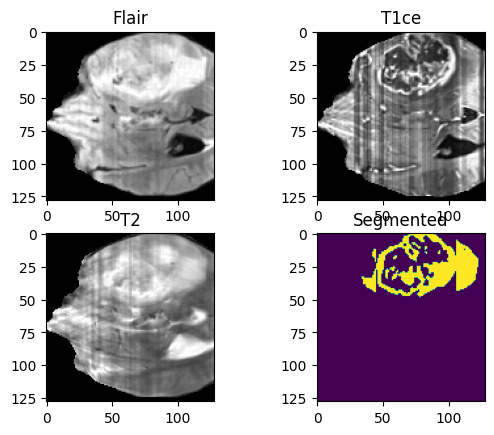

In [61]:
area = 50
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(test_img[:,:,area,0], cmap = 'gray')
axs[0,1].imshow(test_img[:,:,area,1], cmap = 'gray')
axs[1,0].imshow(test_img[:,:,area,2], cmap = 'gray')
axs[1,1].imshow(test_mask[:,:,area])

axs[0,0].set_title('Flair')
axs[0,1].set_title('T1ce')
axs[1,0].set_title('T2')
axs[1,1].set_title('Segmented')
plt.show()